In [1]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import sys
import os

import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('/cellar/users/y8qin/Data/my_utils/')
from file_utils import *

%load_ext autoreload
%autoreload 2

In [2]:
lung1 = pd.read_csv('../data/Lung1.csv')
lung2 = pd.read_csv('../data/Lung2.csv')
lung3 = pd.read_csv('../data/Lung3.csv')

In [3]:
print(lung1.shape)
print(lung2.shape)
print(lung3.shape)

(104655, 21)
(61834, 21)
(110563, 21)


In [4]:
# Remove segmentation error
lung1 = lung1[lung1['CellID'] <= 87500]

In [5]:
lung1.head(2)

,CellID,Label,Immune,Stroma,Tumor,Area,Eccentricity,Solidity,Extent,EulerNumber,Perimeter,MajorAxisLength,MinorAxisLength,Orientation,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5,X_position,Y_position
0,1,Stroma,0.084226,0.913542,0.002232,236,0.957049,0.810997,0.428312,1,78.70,34.044535,9.870373,-29.378275,2,570,598,643,654,13.957627,467.186441
1,2,Stroma,0.279038,0.719192,0.001770,201,0.638133,0.922018,0.744444,1,53.45,18.572493,14.299456,-46.545586,1,3,4,226,227,7.666667,525.970149


In [6]:
lung1['Label'].value_counts() / lung1.shape[0]

Immune    0.467463
Tumor     0.275829
Stroma    0.256709
Name: Label, dtype: float64

In [7]:
lung2['Label'].value_counts() / lung2.shape[0]

Immune    0.441133
Tumor     0.322040
Stroma    0.236828
Name: Label, dtype: float64

In [8]:
lung3['Label'].value_counts() / lung3.shape[0]

Immune    0.554010
Stroma    0.252282
Tumor     0.193709
Name: Label, dtype: float64

In [9]:
lung1['sample'] = [1]*lung1.shape[0]
lung2['sample'] = [2]*lung2.shape[0]
lung3['sample'] = [3]*lung3.shape[0]
lung = pd.concat([lung1, lung2, lung3])

In [10]:
before_cell_count = lung.shape[0]
# Remove Area < 50 and >10,000
lung = lung[(lung['Area'] >= 50) & (lung['Area'] <= 10000)]
print('Area filtered {} cells'.format(before_cell_count - lung.shape[0]))

Area filtered 15343 cells


In [11]:
save_obj(lung, './lung.pkl')
lung.to_csv('lung.csv', index=False)

### Check label quality

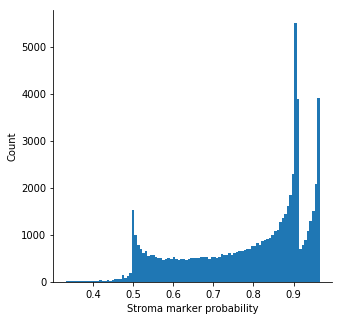

In [25]:
plt.figure(figsize=(5,5))
plt.hist(lung[lung['Label'] == 'Stroma']['Stroma'].values, bins=100)
sns.despine()
plt.xlabel('Stroma marker probability')
plt.ylabel('Count')
plt.show()

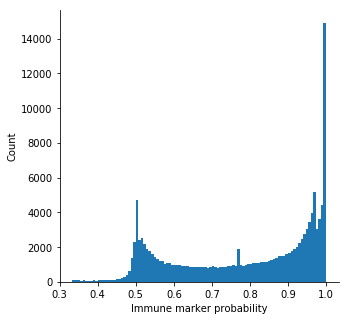

In [28]:
plt.figure(figsize=(5,5))
plt.hist(lung[lung['Label'] == 'Immune']['Immune'].values, bins=100)
sns.despine()
plt.xlabel('Immune marker probability')
plt.ylabel('Count')
plt.show()

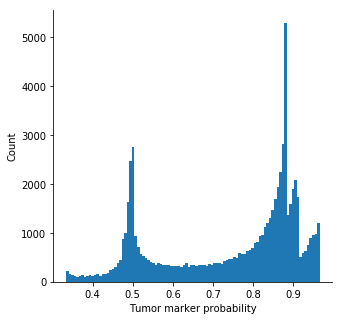

In [29]:
plt.figure(figsize=(5,5))
plt.hist(lung[lung['Label'] == 'Tumor']['Tumor'].values, bins=100)
sns.despine()
plt.xlabel('Tumor marker probability')
plt.ylabel('Count')
plt.show()

### Quality filter

    Filter out cells with label marker probability less than 50%

In [30]:
prob_thre = 0.5
lung[lung]

,CellID,Label,Immune,Stroma,Tumor,Area,Eccentricity,Solidity,Extent,EulerNumber,Perimeter,MajorAxisLength,MinorAxisLength,Orientation,Neighbor_1,Neighbor_2,Neighbor_3,Neighbor_4,Neighbor_5,X_position,Y_position,sample
0,1,Stroma,0.084226,0.913542,0.002232,236,0.957049,0.810997,0.428312,1,78.70,34.044535,9.870373,-29.378275,2,570,598,643,654,13.957627,467.186441,1
1,2,Stroma,0.279038,0.719192,0.001770,201,0.638133,0.922018,0.744444,1,53.45,18.572493,14.299456,-46.545586,1,3,4,226,227,7.666667,525.970149,1


In [32]:
lung['Tumor'].max()

0.9665352965544304

In [33]:
print(lung1['Tumor'].max())
print(lung2['Tumor'].max())
print(lung3['Tumor'].max())

0.9152491406865371
0.8818152222158043
0.9665352965544304


In [35]:
lung['EulerNumber'].value_counts()

 1    276886
 0       160
-1         5
-3         1
Name: EulerNumber, dtype: int64